# Example Explanatory Data Analysis

## Introduction

Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

We need to familiarize ourselves with the data and do some preprocessing before we start the analysis.

### The dataset

The analysis will be carried out on a dataset from a questionnaire on mental health in IT.

Each column in the set represents a question. Description of the questions is available on Kaggle:
https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

The questionnaire was voluntary and available online to the public.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as scp

### Loading the data

In [ ]:
df = pd.read_csv("survey.csv")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Basic checks

### How the data does look like?

In [ ]:
df.head()

### How much of the data is missing?

<AxesSubplot:>

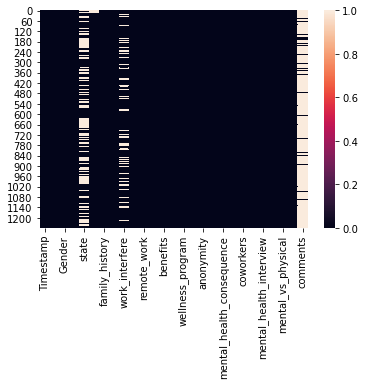

In [ ]:
sb.heatmap(df.isnull())

### What we got then?

The respondent for each question could choose one of several available. Hence, most of the data is categorical. 

The only numeric column is Age. 
There is a missing data in few columns: state, work_interfere and comments. 
Comments were probably an optional question. Also, the state field was not meaningful for the people outside US. 
Last but not least, work_interfere might be ignored by a part of the respondents due to its private reasons. However, these should not interfere with our analysis.

## Some preprocessing

During preprocessing, I want to catch any anomalies in the data to remove them. Like invalid input data, outliers, etc.

One of the ways to approach this is simply plotting the columns.

### Problematic custom input question

#### Reducing values

As we can see below, there was also a question into which respondents could write whatever they wanted.

Such a column will be problematic for further analysis. Therefore, we need to reduce these values to a few "standard" ones. Proper set of possible values could be `male`, `female`, `other`.

<AxesSubplot:>

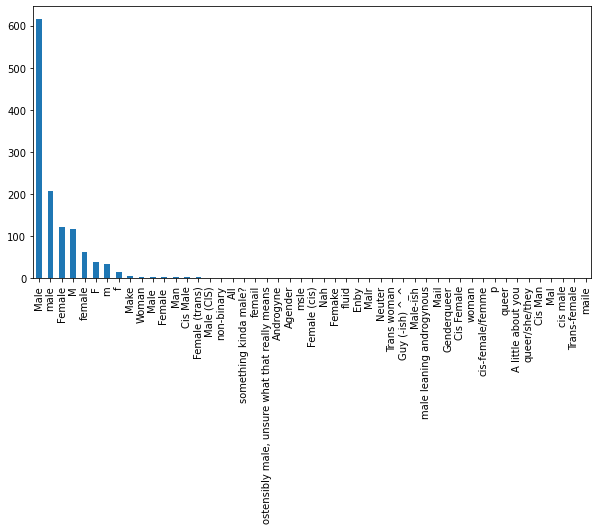

In [ ]:
df['Gender'].value_counts().plot.bar(figsize=(10,5))

In [49]:
np.sort(df['Gender'].unique())

array(['A little about you', 'Agender', 'All', 'Androgyne', 'Cis Female',
       'Cis Male', 'Cis Man', 'Enby', 'F', 'Femake', 'Female', 'Female ',
       'Female (cis)', 'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^',
       'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)',
       'Male-ish', 'Malr', 'Man', 'Nah', 'Neuter', 'Trans woman',
       'Trans-female', 'Woman', 'cis male', 'cis-female/femme', 'f',
       'femail', 'female', 'fluid', 'm', 'maile', 'male',
       'male leaning androgynous', 'msle', 'non-binary',
       'ostensibly male, unsure what that really means', 'p', 'queer',
       'queer/she/they', 'something kinda male?', 'woman'], dtype=object)

In [5]:
isFemale = df.Gender.str.contains("Female|F|Femake|Female|Woman|female|f|femail", case=False)
isMale = df.Gender.str.startswith(('Male', 'Cis M','cis m', 'm', 'M'))

isOther = ~isMale & ~isFemale
df.Gender = np.where(isOther, 'Other', np.where(isMale, 'Male', np.where(isFemale, 'Female', df.Gender)))

#### Result

<AxesSubplot:xlabel='Country'>

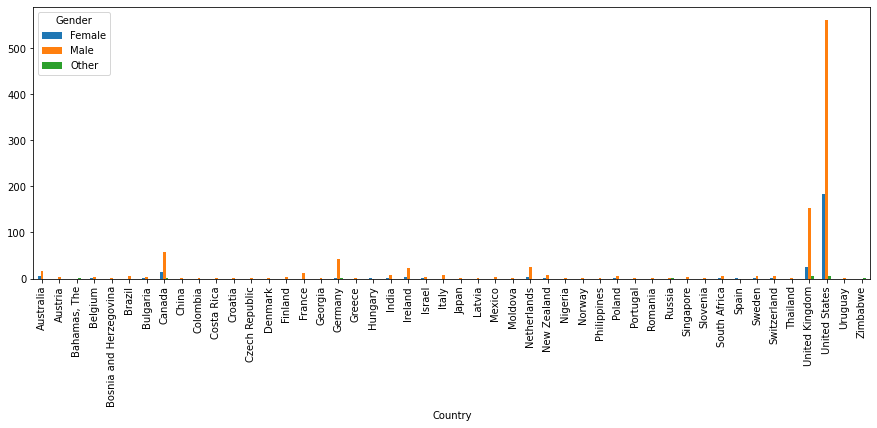

In [51]:
df.groupby(['Country', 'Gender']).size().unstack().plot.bar(figsize=(15,5))

### Another invalid input

#### Trimming outliers in `Age`

<AxesSubplot:xlabel='Age'>

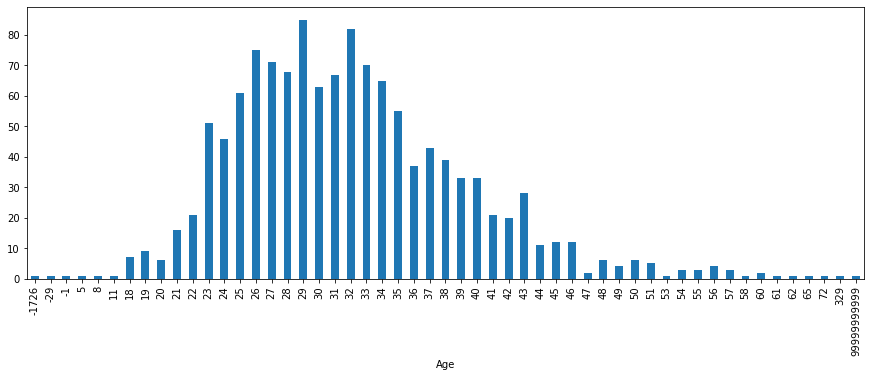

In [53]:
df.groupby(['Age']).size().plot.bar(figsize=(15,5))

In [6]:
df = df[(df.Age >= 18) & (df.Age <= 100)]

#### Result

<AxesSubplot:xlabel='Age'>

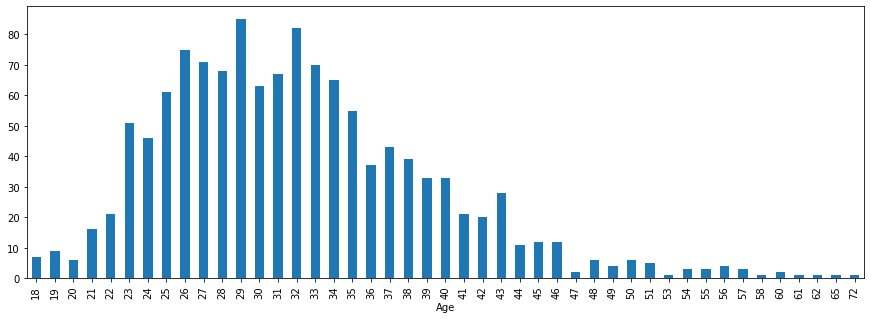

In [55]:
df.groupby(['Age']).size().plot.bar(figsize=(15,5))

## The statistical bias in the provided dataset

First, the analysis of our data will not be meaningful. The data is __biased__.

What we have here is __voluntary response bias__.
Often, __voluntary response samples__ over-sample people who have strong opinions and under-sample people who don't have much interest in the research topic. [[source]](https://web.ma.utexas.edu/users/mks/statmistakes/biasedsampling.html) Therefore, we are unable to draw valid conclusions from this data. The sample presented does not represent the general population.

The first step to enable us to possibly draw some conclusions about our target group (e.g., people working in IT) is to select respondents to the survey using an appropriate statistical method. [[example]](https://www.khanacademy.org/math/statistics-probability/designing-studies/sampling-methods-stats/a/sampling-methods-review)

However, we can still draw and analyse some plots.

## Analysis

### Multiplot of questions

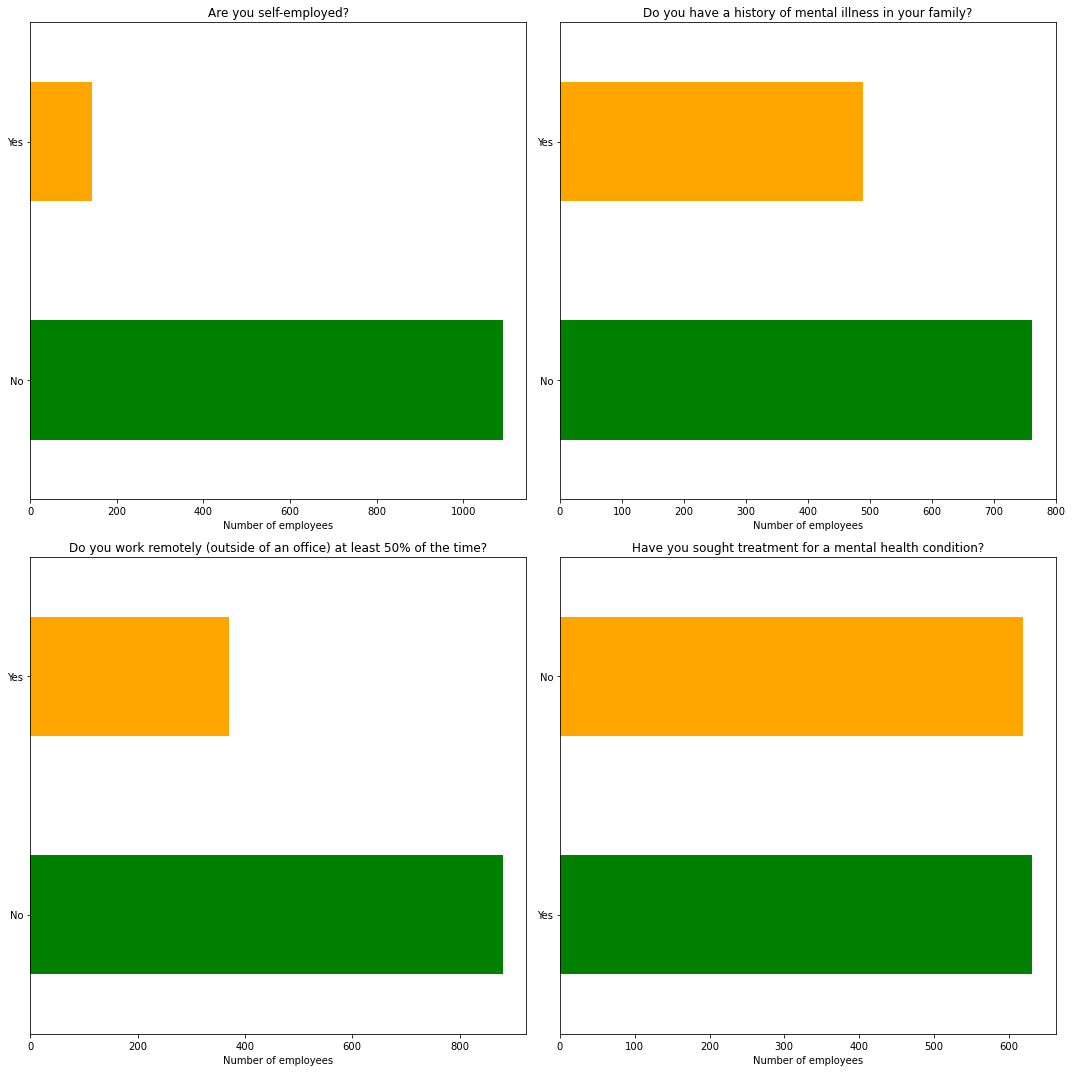

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    
df.self_employed.value_counts().plot.barh(ax=axes[0, 0], color=['green', 'orange'])
axes[0, 0].set_title("Are you self-employed?")
axes[0, 0].set_xlabel("Number of employees")

df.family_history.value_counts().plot.barh(ax=axes[0, 1], color=['green', 'orange'])
axes[0, 1].set_title("Do you have a history of mental illness in your family?")
axes[0, 1].set_xlabel("Number of employees")

df.remote_work.value_counts().plot.barh(ax=axes[1, 0], color=['green', 'orange'])
axes[1, 0].set_title("Do you work remotely (outside of an office) at least 50% of the time?")
axes[1, 0].set_xlabel("Number of employees")

df.treatment.value_counts().plot.barh(ax=axes[1, 1], color=['green', 'orange'])
axes[1, 1].set_title("Have you sought treatment for a mental health condition?")
axes[1, 1].set_xlabel("Number of employees")

fig.tight_layout()

#### Takeaway note

Over half of the respondents sought the medical health treatment. As expected, due to the voluntary response bias, we can actually see that we have strong representation of people interested in mental health. Because people who sought mental health treatment most often will be also interested in related topics. And, for sure, in related surveys as well.

### Questions

#### What are the demographics of the respondents?

(<AxesSubplot:>,
 Male      987
 Female    252
 Other      12
 Name: Gender, dtype: int64)

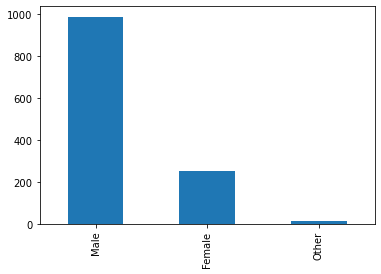

In [57]:
df.Gender.value_counts().plot.bar(), df.Gender.value_counts()

In [ ]:
df.Age.describe() # majority (75% and less) is people 36 yrs old or less

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

(<AxesSubplot:>,
 United States             746
 United Kingdom            184
 Canada                     72
 Germany                    45
 Netherlands                27
 Ireland                    27
 Australia                  21
 France                     13
 India                      10
 New Zealand                 8
 Switzerland                 7
 Sweden                      7
 Italy                       7
 Poland                      7
 Belgium                     6
 Brazil                      6
 South Africa                6
 Israel                      5
 Bulgaria                    4
 Singapore                   4
 Austria                     3
 Finland                     3
 Russia                      3
 Mexico                      3
 Croatia                     2
 Denmark                     2
 Colombia                    2
 Portugal                    2
 Greece                      2
 Slovenia                    1
 Hungary                     1
 Romania              

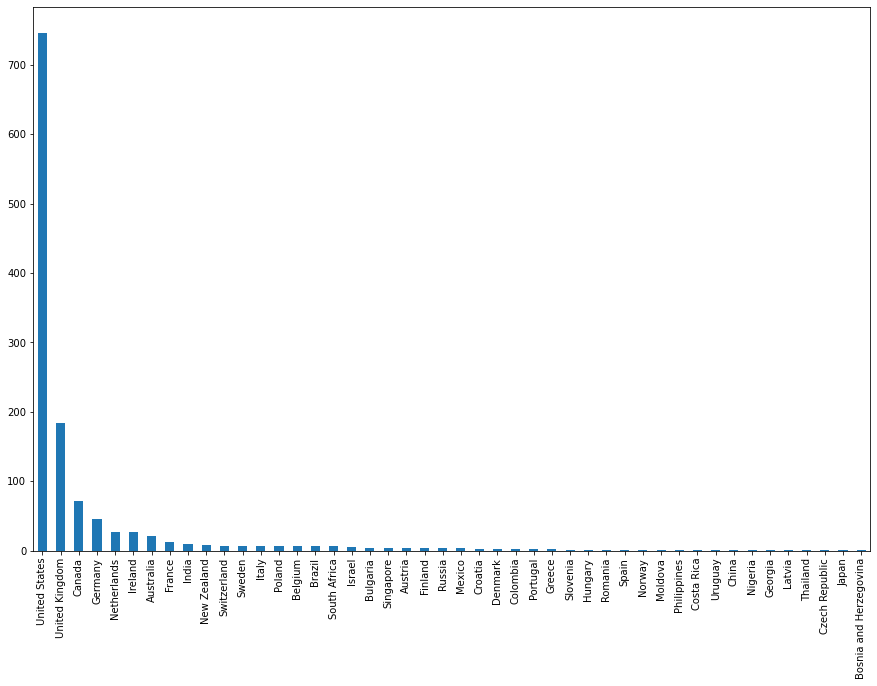

In [59]:
df.Country.value_counts().plot.bar(figsize=(15,10)), df.Country.value_counts()

##### Conclusion

Average age is 32, the median is 31. The majority of the respondents (75% or less) is also at age 32 years old or less.

#### Is mental health still stigmatized?

Questions were too long to include in the charts title.

**Question A**: Do you think that discussing a physical health issue with your employer would have negative consequences

**Question B**: Do you think that discussing a mental health issue with your employer would have negative consequences

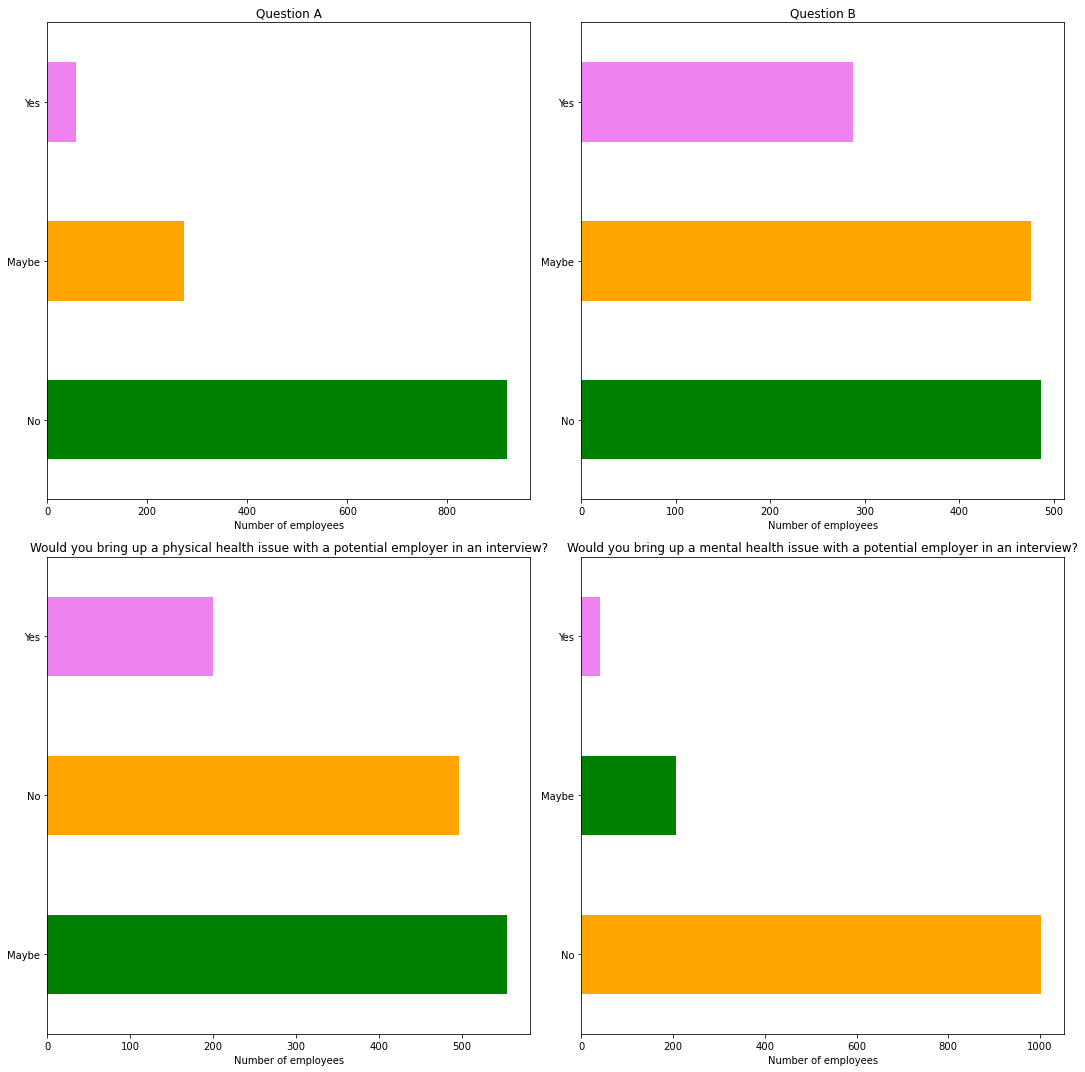

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

df.phys_health_consequence.value_counts().plot.barh(ax=axes[0, 0], color=['green', 'orange', 'violet'])
axes[0, 0].set_title("Question A")
axes[0, 0].set_xlabel("Number of employees")

df.mental_health_consequence.value_counts().plot.barh(ax=axes[0, 1], color=['green', 'orange', 'violet'])
axes[0, 1].set_title("Question B")
axes[0, 1].set_xlabel("Number of employees")

df.phys_health_interview.value_counts().plot.barh(ax=axes[1,0], color=['green', 'orange', 'violet'])
axes[1, 0].set_title("Would you bring up a physical health issue with a potential employer in an interview?")
axes[1, 0].set_xlabel("Number of employees")

df.mental_health_interview.value_counts().plot.barh(ax=axes[1, 1], color=['orange', 'green', 'violet'])
axes[1,1].set_title("Would you bring up a mental health issue with a potential employer in an interview?")
axes[1, 1].set_xlabel("Number of employees")

fig.tight_layout()

In [61]:
df.phys_health_consequence.value_counts(), df.phys_health_interview.value_counts()

(No       920
 Maybe    273
 Yes       58
 Name: phys_health_consequence, dtype: int64,
 Maybe    555
 No       496
 Yes      200
 Name: phys_health_interview, dtype: int64)

In [62]:
df.mental_health_consequence.value_counts(), df.mental_health_interview.value_counts()

(No       487
 Maybe    476
 Yes      288
 Name: mental_health_consequence, dtype: int64,
 No       1003
 Maybe     207
 Yes        41
 Name: mental_health_interview, dtype: int64)

##### Conclusion

920 (73% out of the whole group) out of the 1251 respondents thinks that bringing physical health matters would not have negative consequences. In contrast, only 487 (39%) out of the 1251 respondents thinks bringing mental health matter would have negative consequences. It's 61% difference between these two categories.

The trend that discourages mental health over a physical health follows into the second question too. 496 (39%) respondents would not bring up a physical health issue during a interview in comparison to 1003 (80%) respondents about mental health issue. It's a 67% difference. Only 41 people out of the 1251 would dicuss a mental health issue during interview. It's only 3.2%.

Respondents still recognizes mental health matters as a something that is stigmatized.

#### Does anonymity helps undertaking a mental health treatment?

In [63]:
cross = pd.crosstab(df.anonymity, df.treatment)

cross

treatment,No,Yes
anonymity,,
Don't know,446,369
No,27,37
Yes,146,226


<AxesSubplot:xlabel='anonymity'>

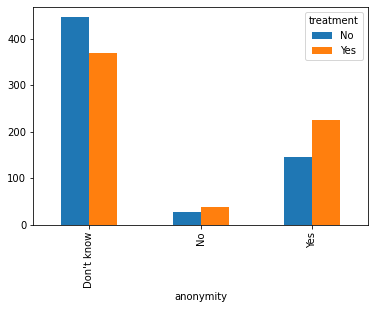

In [64]:
cross.plot.bar()

##### Conclusion

Data sample is too small to get insights about the question from this data sample, there is no significant change in employees whose anonimity is protected (27 vs 37) and there is too much undecided people.

#### Does mental health care benefits have impact on the frequency of undertaking a treatment?

##### Conducting a chi-square test

A Chi-square test is a hypothesis testing method. Tests involve checking if observed frequencies in one or more categories match expected frequencies.

In [ ]:
btdf = df[(df.benefits == 'Yes') | (df.benefits == 'No')]

cross = pd.crosstab(btdf.benefits, btdf.treatment, margins=False)
cross

treatment,No,Yes
benefits,,
No,192,179
Yes,171,302


In [66]:
179/(192+179)

0.48247978436657685

In [67]:
302/(171+302)

0.638477801268499

In [68]:
0.63/0.48

1.3125

From the basic probability formulas, probability for treatment in a group of workers who does not have benefits is 0.48. For those who have, the probability is 0.64. People whose employer provide mental care health benefits are 1.31 times more likely to seek for a treatment. 

At this point, we can make a null hypothesis. Let $H_0$ be "there is no relation between frequency of undertaking a mental health treatment and provided benefits in one's work place".

In [ ]:
(chi, p) = scp.stats.chi2_contingency(cross) # returns X^2, p, degree of freedom, ...

chi, p

(20.01105185974582,
 7.699586491700891e-06,
 1,
 array([[159.56516588, 211.43483412],
        [203.43483412, 269.56516588]]))

$X^{2}$ = 20.011, $p < 0.05$, hence I conclude that there is a significant association between treatment and mental health care work benefits and this relation should be explored deeper.

#### Benefits influence on treatment

In [35]:
df['benefits_level'] = df[['benefits', 'seek_help', 'care_options', 'wellness_program']].replace({'Yes': 1, 'No': 0}).apply(lambda x: pd.to_numeric(x, 'coerce')).sum(axis=1)

df['benefits_level'].describe()

count    1251.000000
mean        1.107914
std         1.311009
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: benefits_level, dtype: float64

Text(0, 0.5, 'Percentage of employees that decided on treatment')

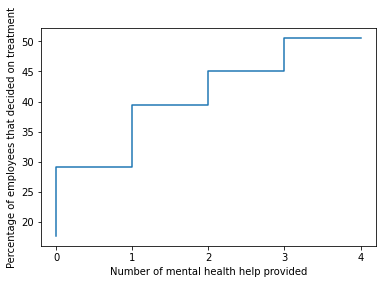

In [56]:
t = df[df.treatment == 'Yes']
t = t.groupby('benefits_level')

sum = t.treatment.count().cumsum()/len(df)*100

plt.step([0, 1, 2, 3, 4], sum)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Number of mental health help provided')
plt.ylabel('Percentage of employees that decided on treatment')

## Summmary 

Skipping what was said already about biased dataset, the major takeaway from the survey is one thing: mental health matters are still a intimate thing for a big part of the respondents. Majority of the respondents still recognizes it as something stigmatized in the society. However, it's enough to provide only one resource of help (either mental health care benefits, good information about health social programs, direct discussion about mental health care as a part of employer wellness program or informative campaign about mental health issues and ways to handle them) to significantly increase a mental health issues treatment amongst workers (visible on the last step plot).